In [1]:
#importing libraries
import csv

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sys import maxsize
from numpy import set_printoptions

from sklearn.datasets import load_boston


In [2]:
with open('../../data/features/benign-bow.csv', 'r') as f:
    original_benign_bow_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/benign-count.csv', 'r') as f:
    original_benign_count_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/malicious-bow.csv', 'r') as f:
    original_malicious_bow_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/malicious-count.csv', 'r') as f:
    original_malicious_count_data = list(csv.reader(f, delimiter=","))

In [3]:
kw_feature_names = np.array(original_benign_bow_data[0:1])
kw_feature_names = kw_feature_names[0]
#print(kw_feature_names)
addl_feature_names = np.array(original_benign_count_data[0:1])
addl_feature_names=addl_feature_names[0]
#print(addl_feature_names)
feature_names=np.concatenate((kw_feature_names, addl_feature_names, ['benign_mal']), axis=0)
print(feature_names)

['<?php' 'and' 'or' 'xor' '__TRAIT__' '__FILE__' '__DIR__' '__NAMESPACE__'
 'exception' '__LINE__' 'array' 'as' 'break' 'case' 'class' 'const'
 'continue' 'declare' 'default' 'die' 'do' 'echo' 'else' 'elseif' 'empty'
 'enddeclare' 'endfor' 'endforeach' 'endif' 'endswitch' 'endwhile' 'eval'
 'exit' 'extends' 'for' 'foreach' 'function' 'global' 'if' 'include'
 'include_once' 'isset' 'list' 'new' 'print' 'require' 'require_once'
 'return' 'static' 'switch' 'unset' 'use' 'var' 'while' '__FUNCTION__'
 '__CLASS__' '__METHOD__' 'final' 'php_user_filter' 'interface'
 'implements' 'public' 'private' 'protected' 'abstract' 'clone' 'try'
 'catch' 'throw' 'cfunction' 'old_function' 'this' 'file_put_contents'
 'file_get_contents' 'assert' '__construct' '=>' '(' ')' '_POST' '_GET'
 'base64_decode' 'insteadof' 'goto' 'alpha' 'numbers' 'splchars'
 'totalChars' 'benign_mal']


In [4]:
benign_bow_data = np.array(original_benign_bow_data[1:], dtype=np.float)
benign_count_data = np.array(original_benign_count_data[1:], dtype=np.float)
benign_data=np.concatenate([benign_bow_data, benign_count_data], axis=1)
benign_target=[0] * benign_data.shape[0]
benign_data=np.hstack((benign_data, np.atleast_2d(benign_target).T))

In [5]:
malicious_bow_data = np.array(original_malicious_bow_data[1:], dtype=np.float)
malicious_count_data = np.array(original_malicious_count_data[1:], dtype=np.float)
malicious_data=np.concatenate([malicious_bow_data, malicious_count_data], axis=1)
malicious_target=[1] * malicious_data.shape[0]
malicious_data=np.hstack((malicious_data, np.atleast_2d(malicious_target).T))

In [6]:
all_comments = np.concatenate((benign_data, malicious_data), axis=0)
all_comments

array([[  0.,   0.,   0., ...,  28., 131.,   0.],
       [  0.,   1.,   0., ...,  15., 108.,   0.],
       [  0.,   1.,   0., ...,  14.,  73.,   0.],
       ...,
       [  0.,   0.,   0., ...,  29.,  69.,   1.],
       [  1.,   0.,   0., ..., 125., 243.,   1.],
       [  0.,   0.,   0., ...,  29.,  69.,   1.]])

In [7]:
php_kw_dataset = {'data': all_comments, 'feature_names': feature_names}
php_kw_dataset

{'data': array([[  0.,   0.,   0., ...,  28., 131.,   0.],
        [  0.,   1.,   0., ...,  15., 108.,   0.],
        [  0.,   1.,   0., ...,  14.,  73.,   0.],
        ...,
        [  0.,   0.,   0., ...,  29.,  69.,   1.],
        [  1.,   0.,   0., ..., 125., 243.,   1.],
        [  0.,   0.,   0., ...,  29.,  69.,   1.]]),
 'feature_names': array(['<?php', 'and', 'or', 'xor', '__TRAIT__', '__FILE__', '__DIR__',
        '__NAMESPACE__', 'exception', '__LINE__', 'array', 'as', 'break',
        'case', 'class', 'const', 'continue', 'declare', 'default', 'die',
        'do', 'echo', 'else', 'elseif', 'empty', 'enddeclare', 'endfor',
        'endforeach', 'endif', 'endswitch', 'endwhile', 'eval', 'exit',
        'extends', 'for', 'foreach', 'function', 'global', 'if', 'include',
        'include_once', 'isset', 'list', 'new', 'print', 'require',
        'require_once', 'return', 'static', 'switch', 'unset', 'use',
        'var', 'while', '__FUNCTION__', '__CLASS__', '__METHOD__', 'final

In [8]:
php_kw_df = pd.DataFrame(php_kw_dataset['data'], columns=php_kw_dataset['feature_names'])
php_kw_df.tail()

<?php  and   or  xor  __TRAIT__  __FILE__  __DIR__  __NAMESPACE__  \
4867    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4868    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4869    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4870    1.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4871    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   

      exception  __LINE__  ...  _POST  _GET  base64_decode  insteadof  goto  \
4867        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4868        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4869        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4870        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4871        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   

      alpha  numbers  splchars  totalChars  benign_mal  
4867   30.0      6.0      32.0        68.0         1.0  
4868    9.0      0.0      15.0        24.0         1.0  
4869   40.0      0.0      29.0        69.0         1.0  
4870  115.0      3.0     125.0       243.0         1.0  
4871   40.0      0.0      29.0        69.0         1.0  

[5 rows x 89 columns]

In [9]:
##### Data Prep Ends ##########

In [10]:
########## Filter method ###########
# compute the pair wise correlation for all columns  
#The correlation coefficient has values between -1 to 1
##— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
##— A value closer to 1 implies stronger positive correlation
##— A value closer to -1 implies stronger negative correlation
correlation_matrix = php_kw_df.corr().round(2)
correlation_matrix = correlation_matrix.fillna(0)

pd.set_option('display.max_rows', correlation_matrix.shape[0]+1)

correlation_matrix

<?php   and    or  xor  __TRAIT__  __FILE__  __DIR__  \
<?php               1.00 -0.09 -0.04  0.0        0.0       0.0      0.0   
and                -0.09  1.00  0.21  0.0        0.0       0.0      0.0   
or                 -0.04  0.21  1.00  0.0        0.0       0.0      0.0   
xor                 0.00  0.00  0.00  0.0        0.0       0.0      0.0   
__TRAIT__           0.00  0.00  0.00  0.0        0.0       0.0      0.0   
__FILE__            0.00  0.00  0.00  0.0        0.0       0.0      0.0   
__DIR__             0.00  0.00  0.00  0.0        0.0       0.0      0.0   
__NAMESPACE__       0.00  0.00  0.00  0.0        0.0       0.0      0.0   
exception          -0.01 -0.01 -0.00  0.0        0.0       0.0      0.0   
__LINE__            0.00  0.00  0.00  0.0        0.0       0.0      0.0   
array              -0.01 -0.04 -0.02  0.0        0.0       0.0      0.0   
as                 -0.06  0.36  0.19  0.0        0.0       0.0      0.0   
break              -0.01  0.05  0.02  0.0        0.0       0.0      0.0   
case               -0.02  0.13  0.09  0.0        0.0       0.0      0.0   
class              -0.01  0.05  0.02  0.0        0.0       0.0      0.0   
const               0.00  0.00  0.00  0.0        0.0       0.0      0.0   
continue           -0.02  0.07  0.02  0.0        0.0       0.0      0.0   
declare             0.00  0.00  0.00  0.0        0.0       0.0      0.0   
default             0.00  0.00  0.00  0.0        0.0       0.0      0.0   
die                -0.02 -0.02 -0.01  0.0        0.0       0.0      0.0   
do                 -0.05  0.30  0.19  0.0        0.0       0.0      0.0   
echo                0.12 -0.01 -0.01  0.0        0.0       0.0      0.0   
else               -0.02  0.07  0.03  0.0        0.0       0.0      0.0   
elseif              0.00  0.00  0.00  0.0        0.0       0.0      0.0   
empty              -0.01  0.08  0.03  0.0        0.0       0.0      0.0   
enddeclare          0.00  0.00  0.00  0.0        0.0       0.0      0.0   
endfor              0.00  0.00  0.00  0.0        0.0       0.0      0.0   
endforeach          0.00  0.00  0.00  0.0        0.0       0.0      0.0   
endif               0.00  0.00  0.00  0.0        0.0       0.0      0.0   
endswitch           0.00  0.00  0.00  0.0        0.0       0.0      0.0   
endwhile            0.00  0.00  0.00  0.0        0.0       0.0      0.0   
eval               -0.02 -0.03 -0.02  0.0        0.0       0.0      0.0   
exit                0.99 -0.09 -0.04  0.0        0.0       0.0      0.0   
extends             0.00  0.00  0.00  0.0        0.0       0.0      0.0   
for                -0.09  0.44  0.15  0.0        0.0       0.0      0.0   
foreach             0.00  0.00  0.00  0.0        0.0       0.0      0.0   
function           -0.01 -0.02 -0.01  0.0        0.0       0.0      0.0   
global             -0.00  0.03 -0.00  0.0        0.0       0.0      0.0   
if                 -0.05  0.23  0.22  0.0        0.0       0.0      0.0   
include            -0.01  0.00 -0.01  0.0        0.0       0.0      0.0   
include_once        0.00  0.00  0.00  0.0        0.0       0.0      0.0   
isset               0.00  0.00  0.00  0.0        0.0       0.0      0.0   
list               -0.01  0.01 -0.00  0.0        0.0       0.0      0.0   
new                -0.02  0.09  0.04  0.0        0.0       0.0      0.0   
print              -0.01  0.01 -0.00  0.0        0.0       0.0      0.0   
require            -0.00  0.02 -0.00  0.0        0.0       0.0      0.0   
require_once        0.00  0.00  0.00  0.0        0.0       0.0      0.0   
return             -0.01  0.06  0.05  0.0        0.0       0.0      0.0   
static             -0.00 -0.01 -0.00  0.0        0.0       0.0      0.0   
switch             -0.00  0.01 -0.00  0.0        0.0       0.0      0.0   
unset               0.00  0.00  0.00  0.0        0.0       0.0      0.0   
use                -0.01  0.03  0.03  0.0        0.0       0.0      0.0   
var                -0.01 -0.01 -0.01  0.0   

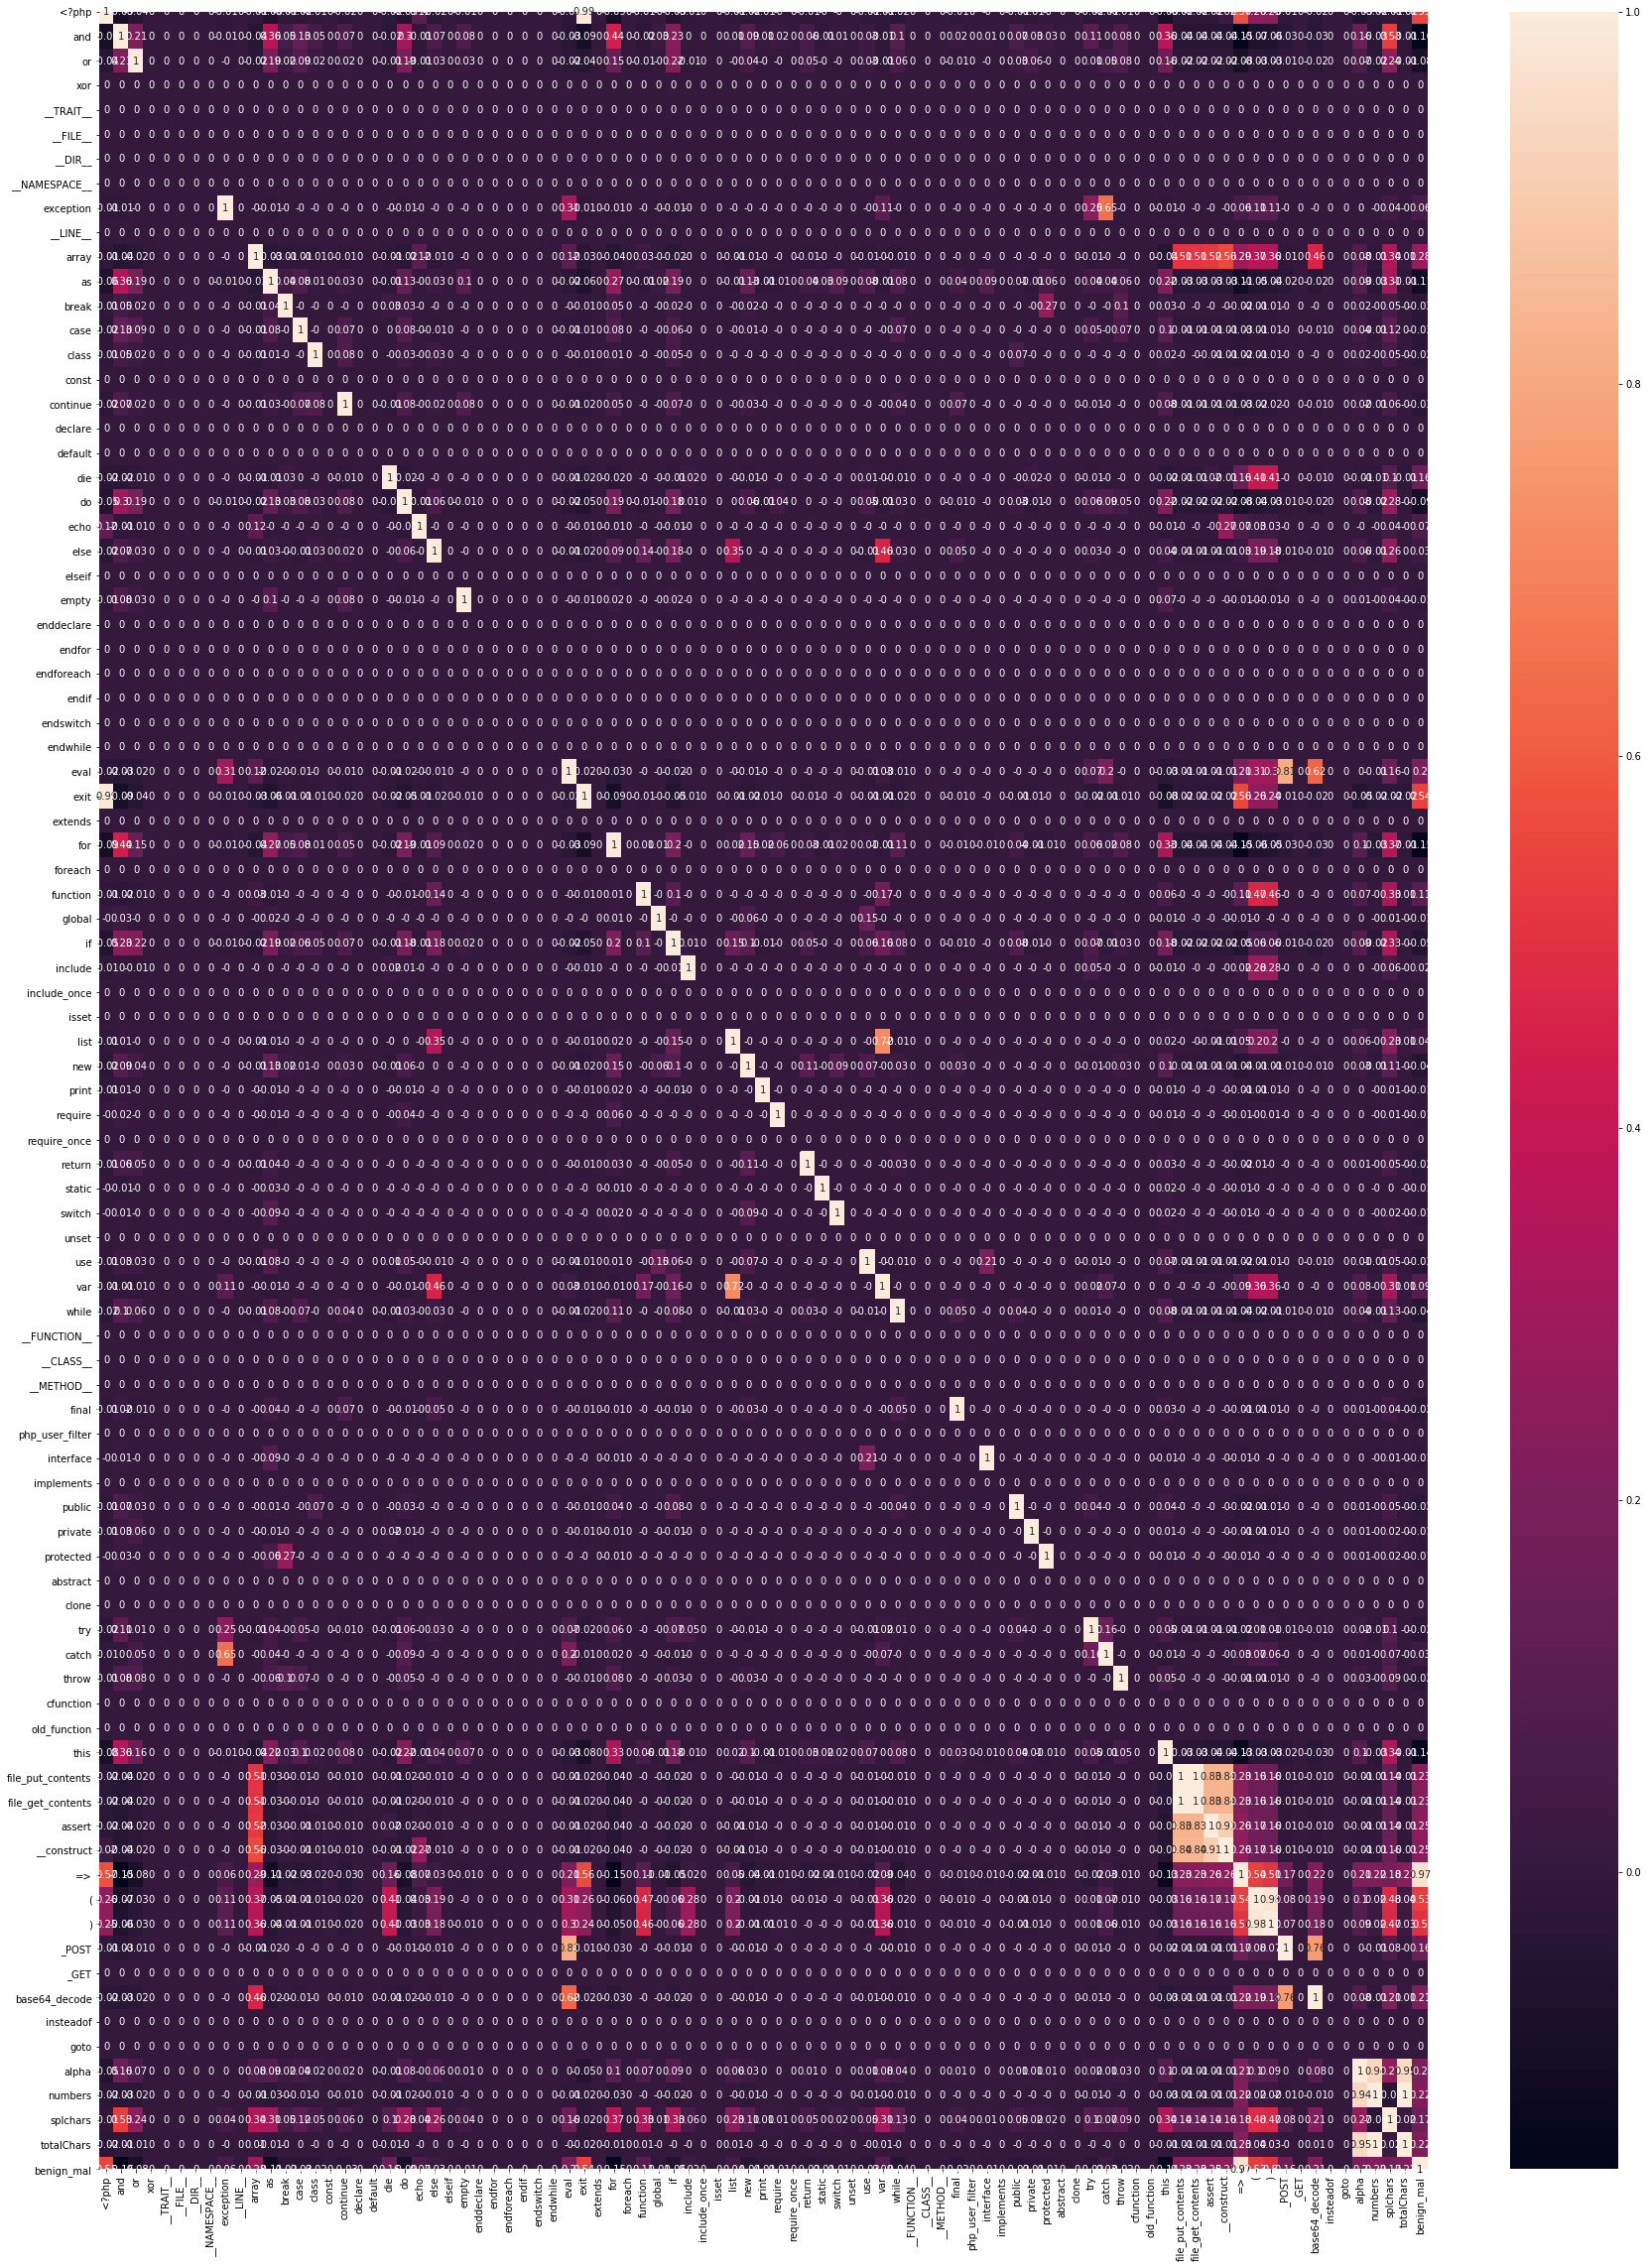

In [11]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.subplots(figsize=(30,40))
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
correlation_matrix['benign_mal']

<?php                0.55
and                 -0.16
or                  -0.08
xor                  0.00
__TRAIT__            0.00
__FILE__             0.00
__DIR__              0.00
__NAMESPACE__        0.00
exception            0.06
__LINE__             0.00
array                0.28
as                  -0.11
break               -0.02
case                -0.03
class               -0.02
const                0.00
continue            -0.03
declare              0.00
default              0.00
die                  0.16
do                  -0.09
echo                 0.07
else                 0.03
elseif               0.00
empty               -0.01
enddeclare           0.00
endfor               0.00
endforeach           0.00
endif                0.00
endswitch            0.00
endwhile             0.00
eval                 0.20
exit                 0.54
extends              0.00
for                 -0.15
foreach              0.00
function             0.11
global              -0.01
if          

In [13]:
##correlation_matrix.sort_values("benign_mal", inplace = True)
corr_target = abs(correlation_matrix['benign_mal'])
  
# filtering data on basis of both filters 
##feature_sel.where(filter1, inplace = True)
selected_feature=corr_target[corr_target>0.150]
selected_feature.sort_values()

and                  0.16
die                  0.16
_POST                0.16
splchars             0.17
eval                 0.20
alpha                0.20
base64_decode        0.21
numbers              0.22
totalChars           0.22
file_put_contents    0.23
file_get_contents    0.23
__construct          0.25
assert               0.25
array                0.28
)                    0.50
(                    0.53
exit                 0.54
<?php                0.55
=>                   0.97
benign_mal           1.00
Name: benign_mal, dtype: float64

In [14]:
features=selected_feature.index
print(selected_feature.shape)

(20,)


In [15]:
#Loading the dataset
x = load_boston()
print(x.feature_names)
#print(x.DESCR)
#print(x.data)
#print(x.target)
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [16]:
print(x.target.shape)

(506,)
